# NLP Visualizations of Macbeth and Romeo and Juliet

Execute the following cell for important imports.

In [145]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

Execute the following cell to get the text of "Macbeth" and "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/) 

In [160]:
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
macbeth_string = response.text
macbeth_string = macbeth_string.split('*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[1]
macbeth_string = macbeth_string.split('*** END OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[0]
macbeth_string = macbeth_string.lower()

target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[0]
r_j_scenes = [i.lower() for i in r_j_string.split('SCENE')[1:]]

You now have the following variables:
* `macbeth_string`: this string contains the full text of "Macbeth"
* `r_j_string`: this string contains the full text of "Romeo and Juliet"
* `r_j_scenes`: the text from each scene of "Romeo and Juliet" is included in this Python list, with one scene per list item

Make two new variables:
* a Python list of stopwords
* a variable for using VADER's SentimentIntensityAnalyzer

In [147]:
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
from nltk.sentiment import vader
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

## Macbeth

Make a list of the words in Macbeth by tokenizing the macbeth_string:

In [148]:
macbeth_words = word_tokenize(macbeth_string)

Next, make a list of positive words and a list of negative words using the `polarity_scores` method of VADER's SentimentIntensityAnalyzer.

Write a for loop that iterates over your Macbeth word list, and:
* if the compound score of a word is positive, add the word to the positive-word list
* if the compound score of a word is negative, add the word to the negative-word list

In [149]:
def get_positive_and_negative_words_lists(full_word_list):
    positive_words = []
    negative_words = []
    for word in full_word_list:
        compound_sentiment_score = sentiment_analyzer.polarity_scores(word)['compound']
        if compound_sentiment_score > 0 : positive_words.append(word)
        elif compound_sentiment_score < 0 : negative_words.append(word)
    return positive_words, negative_words

macbeth_positive_words, macbeth_negative_words = get_positive_and_negative_words_lists(macbeth_words)

For any list `mylist`, you can get the word frequencies of words in `mylist` using `nltk.FreqDist(mylist)`, and you can get the `n` most common words with `nltk.FreqDist(mylist).most_common(n)`.

Use these commands to:
1. find the 15 most common negative words in Macbeth and the 15 most common positive words
2. make a horizontal bar plot similar to the plots in the following
3. comment on similarities and differences to the Macbeth plot below

(Plot taken from https://peerchristensen.netlify.app/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/)

![Pos-Neg-Words in Shakespeare](https://peerchristensen.netlify.com/post/2018-06-07-fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies_files/figure-html/unnamed-chunk-19-1.png)

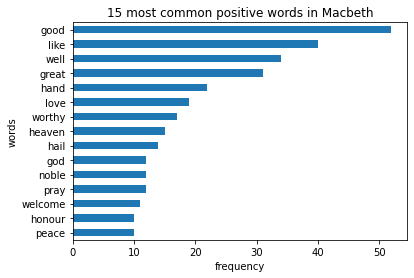

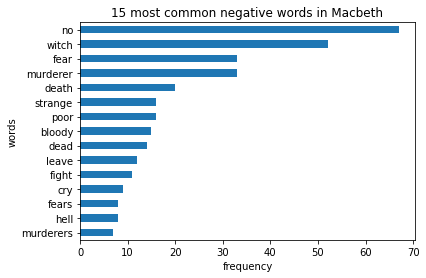

In [150]:
def plot_word_frequencies(positive_words, negative_words, title):
    most_common_positive_words = nltk.FreqDist(positive_words).most_common(15)
    most_common_negative_words = nltk.FreqDist(negative_words).most_common(15)
    
    pd.DataFrame(most_common_positive_words).plot.barh(x=0, y=1, legend=False)
    plt.title('15 most common positive words in ' + title)
    plt.ylabel('words')
    plt.xlabel('frequency')
    plt.gca().invert_yaxis()
    plt.show()

    pd.DataFrame(most_common_negative_words).plot.barh(x=0, y=1,legend=False)
    plt.title('15 most common negative words in ' + title)
    plt.ylabel('words')
    plt.xlabel('frequency')
    plt.gca().invert_yaxis()
    plt.show()
    
plot_word_frequencies(macbeth_positive_words, macbeth_negative_words, "Macbeth")

***The generated bar plot generally looks similar to the published ones, though some of the frequency ordering is different, and some words that appear on our list doesn't make the published list (probably because of different frequency counts). Perhaps different versions of the text, or different algorithms for tokenization/stemming can explain the differences in frequency counts.***

The word list we created from Macbeth did not have the stopwords removed.
* Repeat the above analysis, but do so for a list of Macbeth words in which the stopwords have been removed.
* What changes?

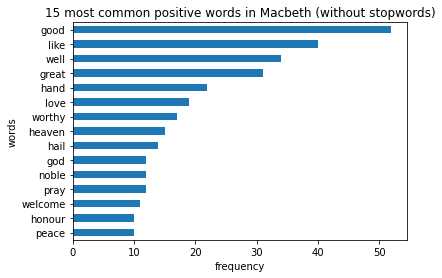

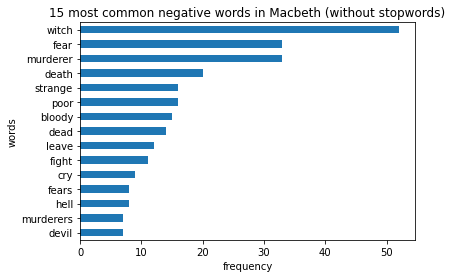

In [151]:
# Code:
macbeth_words_filtered = [word for word in macbeth_words if word not in english_stopwords]
macbeth_positive_words_filtered, macbeth_negative_words_filtered = get_positive_and_negative_words_lists(macbeth_words_filtered)
plot_word_frequencies(macbeth_positive_words_filtered, macbeth_negative_words_filtered, "Macbeth (without stopwords)")

***Removing stopwords removes the word 'no' from the list of negative words, and adds the word 'devil'. Other than that, there are no other differences seen in the frequency counts of the most common positive and negative words. This is likely because common stopwords are (correctly) assessed to be neutral by the sentiment analyzer, and generally do not make it onto the lists of either positive or negative words.***

* Repeat the above analysis one more time -> in addition to removing the stopwords, use the Porter stemmer to get a list of stemmed words before you calculate the word frequencies.
* What words in your plot have now been counted together?

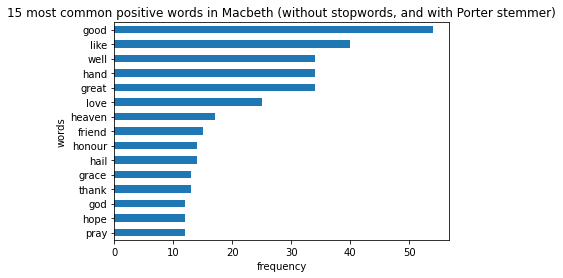

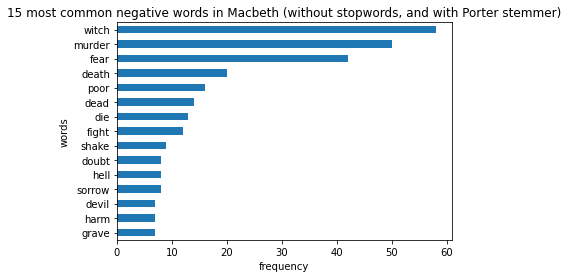

In [152]:
# Code:
from nltk.stem.porter import PorterStemmer
macbeth_filtered_and_stemmed_words = [PorterStemmer().stem(word) for word in macbeth_words_filtered]
macbeth_positive_words_filtered_and_stemmed, macbeth_negative_words_filtered_and_stemmed = get_positive_and_negative_words_lists(macbeth_filtered_and_stemmed_words)
plot_word_frequencies(macbeth_positive_words_filtered_and_stemmed, macbeth_negative_words_filtered_and_stemmed, "Macbeth (without stopwords, and with Porter stemmer)")

***Using the Porter stemmer produces significant differences in frequency counts of the most common positive and negative words, and also significantly changes which words make the list. This is because counts of many words will increase significantly when stemmed to the root word. 'fear' and 'fears' on the previous list were merged. Interestingly, the stemmer does not merge the words 'dead', 'death', and 'die', and indeed using the stemmer causes the word 'die' appear on the list of 15 most common negative words, where it did not appear before (because previously variants were not counted).***


## Romeo and Juliet

We are now going to plot the evolution of sentiment in Romeo and Juliet.

This is motivated by the following plot (also from the afore-mentioned link):
![Sentiment Evolution in Shakespeare](https://peerchristensen.netlify.com/post/2018-06-07-fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies_files/figure-html/unnamed-chunk-11-1.png)

We are going to make a couple different plots.

First:
* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by summing the compound scores of all the words in that scene
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Comment on its resemblance to the Romeo and Juliet plot above.

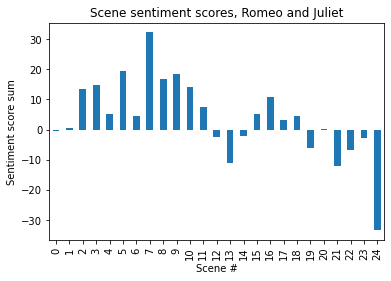

In [159]:
def calculate_scene_sentiment_score(scene, sentiment_score_fn):
    words = word_tokenize(scene)
    scene_sentiment_score = 0
    for word in words:
        sentiment_subscore = sentiment_score_fn(word)
        scene_sentiment_score += sentiment_subscore
    return scene_sentiment_score

calculate_word_sentiment_score = lambda x : sentiment_analyzer.polarity_scores(x)['compound']
scene_sentiment_scores = [calculate_scene_sentiment_score(scene, calculate_word_sentiment_score) for scene in r_j_scenes]

pd.DataFrame(scene_sentiment_scores).plot(kind="bar", legend=False)
plt.title('Scene sentiment scores, Romeo and Juliet')
plt.xlabel('Scene #')
plt.ylabel('Sentiment score sum')
plt.show()

***The general pattern of the generated chart is similar to the published one, though the published chart shows more negative sentiment in the beginning of the play, and more positive sentiment near the end of the play***

Second:
* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 to the score for each positive word (compound_score > 0) and substracting 1 from the score for each negative word (compound_score < 0)**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous method of calculating the total scene sentiment score?

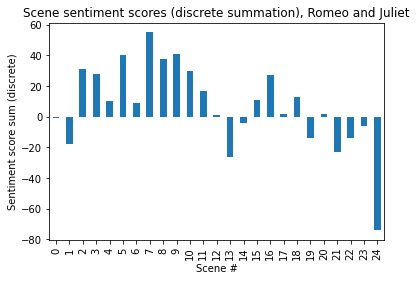

In [154]:
def calculate_discrete_sentiment_score(word):
    if sentiment_analyzer.polarity_scores(word)['compound'] > 0 : return 1
    elif sentiment_analyzer.polarity_scores(word)['compound'] < 0 : return -1
    else : return 0

discrete_scene_sentiment_scores = [calculate_scene_sentiment_score(scene, calculate_discrete_sentiment_score) for scene in r_j_scenes]

pd.DataFrame(discrete_scene_sentiment_scores).plot(kind="bar", legend=False)
plt.title('Scene sentiment scores (discrete summation), Romeo and Juliet')
plt.xlabel('Scene #')
plt.ylabel('Sentiment score sum (discrete)')
plt.show()

***The general pattern and shape of this bar graph is very similar to the previous (non-discrete summation) graph, however the new graph shows negative sentiment at the beginning of the play, which was not shown in the previous graph. This is likely due to words with slightly negative polarity being given more weight with this new summation method.***

Next, we are going to use a new lexicon to assess positive and negative word sentiment, the opinion_lexicon (https://www.nltk.org/api/nltk.corpus.reader.opinion_lexicon.html)

Execute the following cell to make a set of positive words and a set of negative words.

In [155]:
nltk.download('opinion_lexicon')
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/wendy/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


The following cell is an example of checking whether a word is positive or negative according to this opinion lexicon.  Try it out with a couple words.

In [156]:
testword = 'love'
if testword in positive_words:
    print(testword + ' is positive')
elif testword in negative_words:
    print(testword + ' is negative')
else:
    print(testword + ' is neither positive nor negative')

love is positive


Third plot:

* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the positive_words and negative_words sets.**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

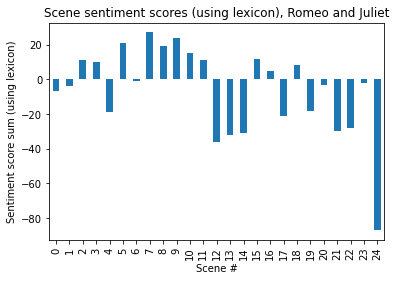

In [157]:
def calculate_lexicon_sentiment_score(word):
    if word in positive_words : return 1
    elif word in negative_words : return -1
    else : return 0

lexicon_scene_sentiment_scores = [calculate_scene_sentiment_score(scene, calculate_lexicon_sentiment_score) for scene in r_j_scenes]

pd.DataFrame(lexicon_scene_sentiment_scores).plot(kind="bar", legend=False)
plt.title('Scene sentiment scores (using lexicon), Romeo and Juliet')
plt.xlabel('Scene #')
plt.ylabel('Sentiment score sum (using lexicon)')
plt.show()


***When using the lexicon to calculate sentiment score, the sentiment graph now shows increased negative sentiment at the beginning, middle, and end of the play, and smaller positive sentiment at the middle. This is likely due to differences in how the lexicon and sentiment analyzer categorizes positive and negative words.***

Fourth plot:

* Take the entire string of Romeo and Juliet (`r_j_string`) and tokenize it into words.
* Calculate a total sentiment score for each consecutive group of 500 words.
  * Do this as immediately above by adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the positive_words and negative_words sets.
* Make a bar plot that has the group number (0,1,2,3,...) on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

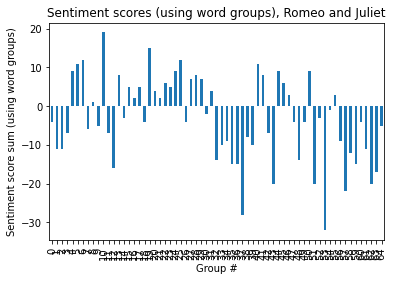

In [158]:
def word_groups(lst, n):
    for i in range(0, len(lst), n):
        yield " ".join(lst[i:i + n])

romeo_and_juliet_words = word_tokenize(r_j_string)
romeo_and_juliet_word_groups = list(word_groups(romeo_and_juliet_words, 500))
word_group_sentiment_scores = [calculate_scene_sentiment_score(word_group, calculate_lexicon_sentiment_score) for word_group in romeo_and_juliet_word_groups]

pd.DataFrame(word_group_sentiment_scores).plot(kind="bar", legend=False)
plt.title('Sentiment scores (using word groups), Romeo and Juliet')
plt.xlabel('Group #')
plt.ylabel('Sentiment score sum (using word groups)')
plt.show()

***This graph looks significantly different from previous graphs, largely because there are many more bars on the x-axis, and we can see more fine-grained sentiment scores. Because of the greater granularity, we can see more mixes of positive and negative sentiment throughout the play, including more negative sentiment at the beginning of the play compared to the other graphs, and more positive sentiment in the middle of the play.***

What method would you use if you had to report on the evolution of sentiment in Romeo and Juliet to an audience of Shakespearian academics?

***I would probably choose the word group method, since it gives greater granularity and nuance, and I think it also makes more sense to split by chunking since there may be many dramatic scenes that have mixed positive and negative sentiment.***